# Twitter Sentiment Analysis

How does twitter feel about x?

By: James Nesfield

Date: 3/5/2023

Purpose: Build a pipeline to ingest twitter data on a specified subject and plot its sentiment over past 1000 tweets.

# Twitter API Access

In order to use it to make requests to Twitter's API, you'll need to go to https://dev.twitter.com/apps and create a sample application.

Choose any name for your application, write a description and use `http://google.com` for the website. 

Under **Key and Access Tokens**, there are four primary identifiers you'll need to note: 
* consumer key, 
* consumer secret, 
* access token, and 
* access token secret (Click on Create Access Token to create those).

Note that you will need an ordinary Twitter account in order to login, create an app, and get these credentials.

In [1]:
#pip install for the package we will be using
!pip install tweepy

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


## 1. Authorizing an application to access Twitter account data

In [2]:
import tweepy

#Setting up the keys and tokens
# these are not shared for obv reasons
c_k = 
c_s = 

a_t = 
a_s =

auth = tweepy.OAuthHandler(c_k, c_s)
auth.set_access_token(a_t, a_s)
api = tweepy.API(auth)
client = tweepy.Client(auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable
#can pickle out the api object for reuse so as to avoid hard coding credentials
# these are not shared for obv reasons
print(api)

## 2. Collecting search results

Set the variable `q` to a trending topic, 
or anything else for that matter. The example query below
was a trending topic when this content was being developed
and is used throughout the remainder of this chapter

In [3]:
# You can change this to whatever hashtag you want, but if the tag isn't
# popular enough you might not get back a lot of results
q = "Keanu"
max_results = 10000


search_results = tweepy.Cursor(api.search_tweets, q=q, lang = 'en', result_type = 'popular').items(max_results)

#This will give us an Iterator
print(search_results)

# WE will be looking at the tags "retweeted", "retweet count", 
# and the text we found earlier
tweets = []
retweeted = []
retweet_count = []
timestamps = []

for tweet in search_results:
    timestamps.append(tweet.created_at)
    tweets.append(tweet.text)
    retweet_count.append(tweet.retweet_count)
    # This if/else just checks the number of retweets and defines "rewteeted"
    # based on that value
    if tweet.retweet_count > 0:
        retweeted.append(True)
    else:
        retweeted.append(False)


#tweets


In [4]:
# Not necessary, but this does make the data look presentable
import pandas as pd

df = (pd.DataFrame({'Timestamps' : timestamps,
                    'Tweet':tweets, 
                    'Retweeted':retweeted, 
                    'Retweet_Count':retweet_count}))

df
      
      

,Timestamps,Tweet,Retweeted,Retweet_Count
0,2023-03-04 19:06:06+00:00,It's time. Ask Keanu Reeves anything now on @R...,True,288
1,2023-03-02 23:41:11+00:00,Keanu is signing one of these posters to give ...,True,7411
2,2023-03-04 01:14:52+00:00,One of the kindest and most fun actors I’ve ev...,True,50
3,2023-03-04 21:18:23+00:00,"Unsurprisingly, the Keanu Reeves AMA is a very...",True,23
4,2023-03-03 00:30:00+00:00,Keanu Reeves and Bill Skarsgård choose the rul...,True,149
5,2023-03-04 17:05:06+00:00,Calling all @JohnWickMovie fans: Keanu Reeves ...,True,19
6,2023-03-03 19:49:04+00:00,John Wick. Neo. Ted. Constantine. Jack Traven....,True,28
7,2023-03-04 20:41:12+00:00,Keanu Reeves says there has never been role he...,True,28
8,2023-03-04 20:43:01+00:00,Keanu Reeves voices interest in playing Wolver...,True,29
9,2023-02-23 15:23:51+00:00,Keanu Reeves trained for 3 months to do his ow...,True,2637


## 3. Sentiment Analysis

Using a Bert Model from Hugging Face we can process sentiment analysis.

https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis

This specific model is capable of giving 3 class ratings simplifying the sentiment problem down to something a bit more understandable.

the class labels will be:
- 0 negative
- 1 neutral
- 2 positive

In [5]:
!pip install transformers

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

#create model and toeknizer objects from hugging face transformers
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [7]:
#build simple function to get the classification from the above model and tokenizer objects
def get_prediction(text):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
        
    predicted_class_id = logits.argmax().item()
    
    return predicted_class_id



In [8]:
#test prediction
get_prediction("keanu sucks")

0

In [9]:
df["classification"] = df.apply(lambda x:get_prediction(x.Tweet), axis = 1)

df

,Timestamps,Tweet,Retweeted,Retweet_Count,classification
0,2023-03-04 19:06:06+00:00,It's time. Ask Keanu Reeves anything now on @R...,True,288,1
1,2023-03-02 23:41:11+00:00,Keanu is signing one of these posters to give ...,True,7411,1
2,2023-03-04 01:14:52+00:00,One of the kindest and most fun actors I’ve ev...,True,50,2
3,2023-03-04 21:18:23+00:00,"Unsurprisingly, the Keanu Reeves AMA is a very...",True,23,2
4,2023-03-03 00:30:00+00:00,Keanu Reeves and Bill Skarsgård choose the rul...,True,149,1
5,2023-03-04 17:05:06+00:00,Calling all @JohnWickMovie fans: Keanu Reeves ...,True,19,1
6,2023-03-03 19:49:04+00:00,John Wick. Neo. Ted. Constantine. Jack Traven....,True,28,1
7,2023-03-04 20:41:12+00:00,Keanu Reeves says there has never been role he...,True,28,2
8,2023-03-04 20:43:01+00:00,Keanu Reeves voices interest in playing Wolver...,True,29,2
9,2023-02-23 15:23:51+00:00,Keanu Reeves trained for 3 months to do his ow...,True,2637,1


## 4. Plot Sentiment

plot the sentiment over time to show changes or trends.

show size of point as how many times it has been retweeted


([<matplotlib.axis.YTick at 0x7fee85d01220>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

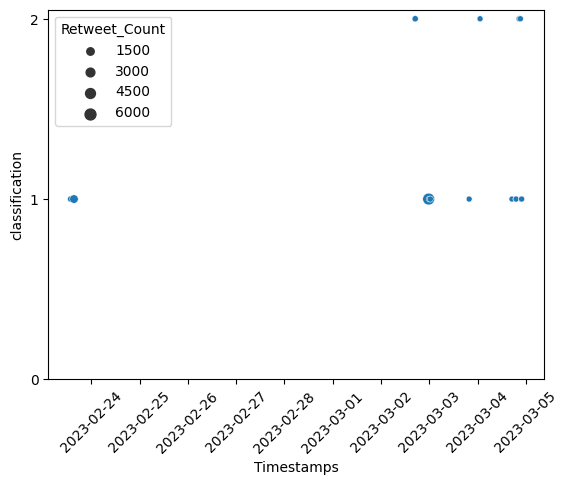

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

(sns.scatterplot(data=df.sort_values(by = 'Timestamps'), 
                 x="Timestamps", 
                 y="classification", 
                 size = 'Retweet_Count'))
plt.xticks(rotation=45)
plt.yticks([0,1,2])